CREDIT RISK MODELING

In [1]:
# Libreria pandas
import pandas as pd

# Importación de los datos crediticios desde un archivo csv
cr_loan = pd.read_csv("DatosCrediticios.csv")

# Tabla interactiva de los datos de crédito
cr_loan

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


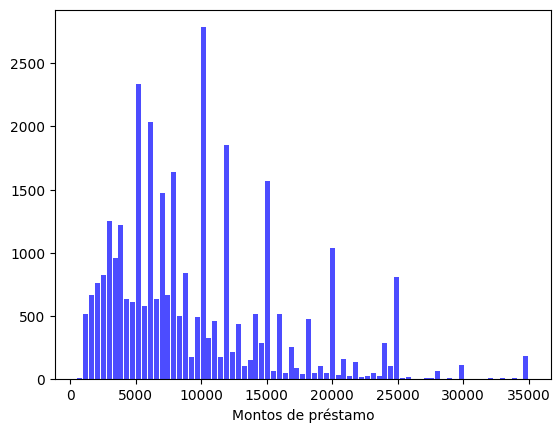

In [2]:
import matplotlib.pyplot as plt

# Distribución de los montos de préstamo
patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Montos de préstamo")
plt.show()

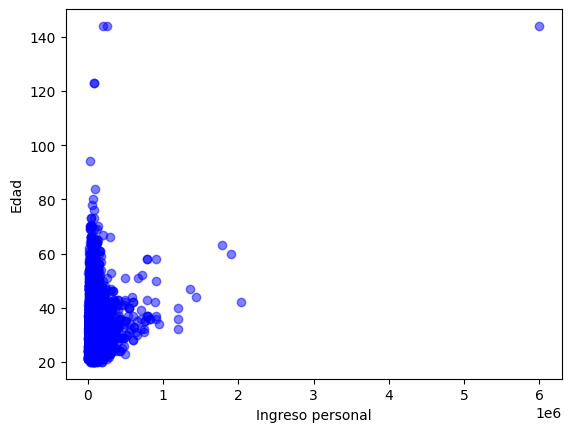

In [3]:
# Diagrama de dispersión de ingresos vs edad
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue', alpha=0.5)
plt.xlabel('Ingreso personal')
plt.ylabel('Edad')
plt.show()

In [4]:
# Tabla cruzada de la intención del préstamo y el estado del préstamo
print(pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True))

loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   6453
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4423  1098   5521
VENTURE             4872   847   5719
All                25473  7108  32581


In [5]:
# Tabla cruzada de la propiedad de la vivienda, el estado del préstamo y el grado
print(pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']]))

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27  


In [6]:
# Tabla cruzada de la propiedad de la vivienda, el estado del préstamo y el porcentaje de ingreso promedio
print(pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'], values=cr_loan['loan_percent_income'], aggfunc='mean'))

loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.146504  0.184882
OTHER                  0.143784  0.300000
OWN                    0.180013  0.297358
RENT                   0.144611  0.264859


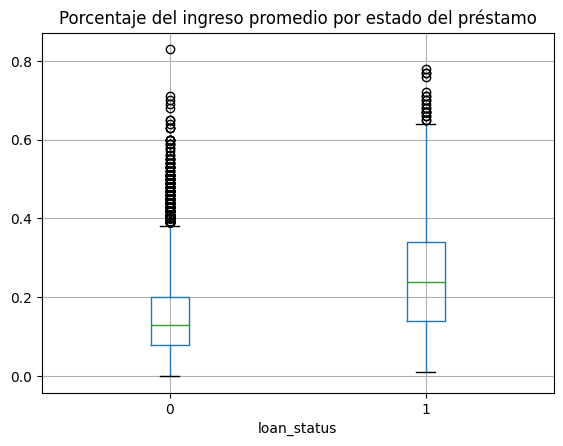

In [7]:
# Create a box plot of percentage income by loan status
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Porcentaje del ingreso promedio por estado del préstamo')
plt.suptitle('')
plt.show()

In [8]:
# Tabla cruzada para el estado del préstamo, la propiedad de la vivienda y la duración máxima del empleo
print(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
                  values=cr_loan['person_emp_length'], aggfunc='max'))

# Matriz de índices donde la duración del empleo sea superior a 60
indices = cr_loan[cr_loan['person_emp_length'] > 60].index

# Nuevo marco de datos sin registros atípicos
cr_loan_new = cr_loan.drop(indices)

# Tabla cruzada del nuevo marco de datos incluyendo la duración mínima del empleo
print(pd.crosstab(cr_loan_new['loan_status'],cr_loan_new['person_home_ownership'],values=cr_loan_new['person_emp_length'],aggfunc=('min','max')))

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0
                           max                        min                
person_home_ownership MORTGAGE OTHER   OWN  RENT MORTGAGE OTHER  OWN RENT
loan_status                                                              
0                         38.0  24.0  31.0  41.0      0.0   0.0  0.0  0.0
1                         34.0  11.0  17.0  27.0      0.0   0.0  0.0  0.0


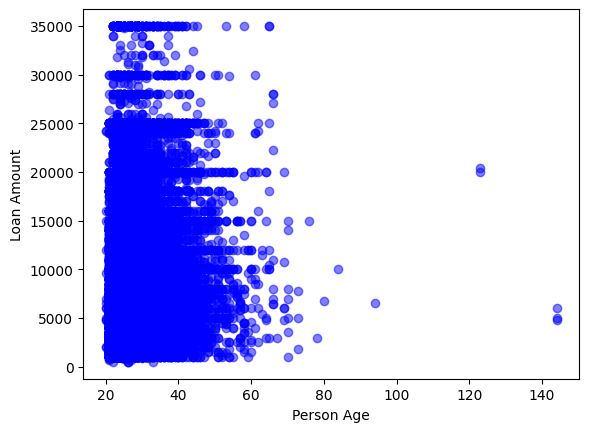

In [9]:
# Diagrama de dispersión para la edad y la cantidad
plt.scatter(cr_loan['person_age'], cr_loan['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

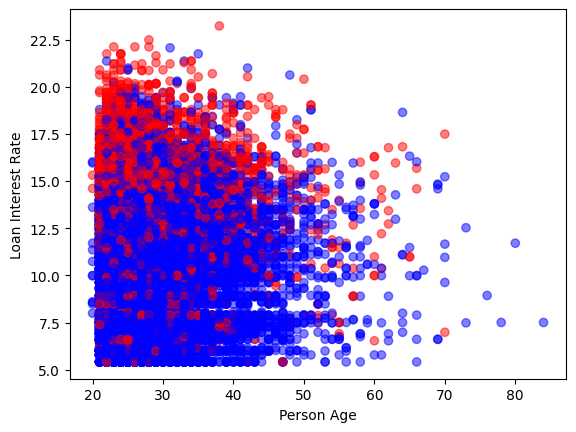

In [10]:
import matplotlib

# Marco de datos con personas de menos de 100 años de edad
cr_loan_new = cr_loan.drop(cr_loan[cr_loan['person_age'] > 100].index)

# Diagrama de dispersión de la edad y la tasa de interés
colors = ["blue","red"]
plt.scatter(cr_loan_new['person_age'], cr_loan_new['loan_int_rate'],
            c = cr_loan_new['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

Index(['person_emp_length', 'loan_int_rate'], dtype='object')
     person_age  person_income person_home_ownership  person_emp_length  \
105          22          12600              MORTGAGE                NaN   
222          24         185000              MORTGAGE                NaN   
379          24          16800              MORTGAGE                NaN   
407          25          52000                  RENT                NaN   
408          22          17352              MORTGAGE                NaN   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
105           PERSONAL          A       2000           5.42            1   
222          EDUCATION          B      35000          12.42            0   
379  DEBTCONSOLIDATION          A       3900            NaN            1   
407           PERSONAL          B      24000          10.74            1   
408          EDUCATION          C       2250          15.27            0   

     loan_percent_income cb_pe

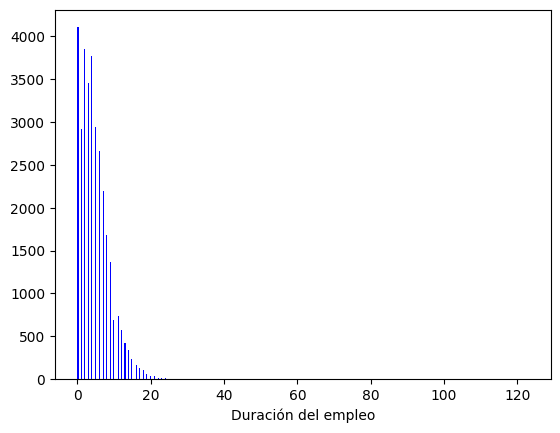

In [11]:
# Matriz de columnas con valores nulos
print(cr_loan.columns[cr_loan.isnull().any()])

# Cinco filas superiores con valores nulos para la duración del empleo
print(cr_loan[cr_loan['person_emp_length'].isnull()].head())

# Reemplazo de los valores nulos con la media para la variable duraciones de empleo
cr_loan['person_emp_length'].fillna((cr_loan['person_emp_length'].median()), inplace=True)

# Histograma de la duración del empleo
n, bins, patches = plt.hist(cr_loan['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Duración del empleo")
plt.show()

In [12]:
# Número de vacios
print(cr_loan['loan_int_rate'].isnull().sum())

# Índices nulos
indices = cr_loan[cr_loan['loan_int_rate'].isnull()].index

# Nueva base de datos sin valores nulos
cr_loan_clean = cr_loan.drop(indices)

3116


In [15]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Importación de los datos crediticios sin vacios desde un archivo csv
cr_loan_clean = pd.read_csv("DatosCrediticios_SinVaciosNiOutliers.csv")

# Variables independiente y dependiente
X = cr_loan_clean[['loan_int_rate']]
y = cr_loan_clean[['loan_status']]

# Modelo de regresión logística y su ajuste
clf_logistic_single = LogisticRegression()
clf_logistic_single.fit(X, np.ravel(y))

# Parametros del modelo
print(clf_logistic_single.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [16]:
print(clf_logistic_single.intercept_)

[-4.45785901]


In [17]:
# Variables independientes
X_multi = cr_loan_clean[['loan_int_rate','person_emp_length']]

# Estatus del préstamo como variable a predecir
y = cr_loan_clean[['loan_status']]

# Modelo de regresión logística multivariada
clf_logistic_multi = LogisticRegression(solver='lbfgs').fit(X_multi, np.ravel(y))

# Print the intercept of the model
print(clf_logistic_multi.intercept_)

[-4.21645549]


In [18]:
from sklearn.model_selection import train_test_split

# Variables independientes y dependiente
# X = cr_loan_clean[['loan_int_rate','person_emp_length','person_income']]
X = cr_loan_clean.loc[:,['loan_int_rate','person_emp_length','person_income']]
y = cr_loan_clean[['loan_status']]

# Conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Ajuste del modelo de regresión logística
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Coeficientes del modelo
print(clf_logistic.coef_)

[[ 1.28517496e-09 -2.27622202e-09 -2.17211991e-05]]


In [19]:
# Conjutos de datos numéricos y no numéricos
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])

# Codificación dummie al conjunto de variables categóricas
cred_str_onehot = pd.get_dummies(cred_str)

# Unión de las variables numéricas con las codificadas
cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)

# Lista de columnas del nuevo cnjunto de datos
print(cr_loan_prep.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')


In [20]:
# Variables independientes y dependiente
X = cr_loan_prep.loc[:,cr_loan_prep.columns != 'loan_status']
y = cr_loan_prep[['loan_status']]

# Conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Entrenamiento del modelo de regresión logística
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Predicciones de probabilidad para el estado del préstamo usando datos de prueba
preds = clf_logistic.predict_proba(X_test)

# Marcos de datos de las primeras cinco predicciones y las primeras cinco etiquetas verdaderas
preds_df = pd.DataFrame(preds[:,1][0:20], columns = ['prob_default'])
true_df = y_test.head(20)

# Comparación de los dos marcos de datos
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

    loan_status  prob_default
0             1      0.445779
1             1      0.223447
2             0      0.288558
3             0      0.169358
4             1      0.114182
5             1      0.490257
6             0      0.162057
7             0      0.396211
8             1      0.217428
9             1      0.481440
10            1      0.243327
11            1      0.404546
12            0      0.063662
13            0      0.254207
14            1      0.416166
15            0      0.367900
16            0      0.246369
17            1      0.027882
18            0      0.106589
19            0      0.347888


In [21]:
# Dataframe de las probabilidades de incumplimiento
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

# Estado del préstamo según la probabilidad asignada
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda X: 1 if X > .5 else 0)

# Recuento de filas para cada estado de préstamo
print(preds_df['loan_status'].value_counts())


0    11175
1      609
Name: loan_status, dtype: int64


In [22]:
from sklearn.metrics import classification_report

# Reporte de clasificación
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.81      0.98      0.89      9198
     Default       0.71      0.17      0.27      2586

    accuracy                           0.80     11784
   macro avg       0.76      0.57      0.58     11784
weighted avg       0.79      0.80      0.75     11784



In [23]:
from sklearn.metrics import precision_recall_fscore_support

# Valores no promedio del informe
print(precision_recall_fscore_support(y_test,preds_df['loan_status']))

(array([0.80742729, 0.71264368]), array([0.98097412, 0.16782676]), array([0.8857802 , 0.27167449]), array([9198, 2586], dtype=int64))


In [24]:
# Dos primeros números del informe
print(precision_recall_fscore_support(y_test,preds_df['loan_status'])[0:2])

(array([0.80742729, 0.71264368]), array([0.98097412, 0.16782676]))


In [25]:
# Predicciones para la probabilidad de incumplimiento
preds = clf_logistic.predict_proba(X_test)

# Puntuación de precisión del modelo
print(clf_logistic.score(X_test, y_test))

0.8025288526816021


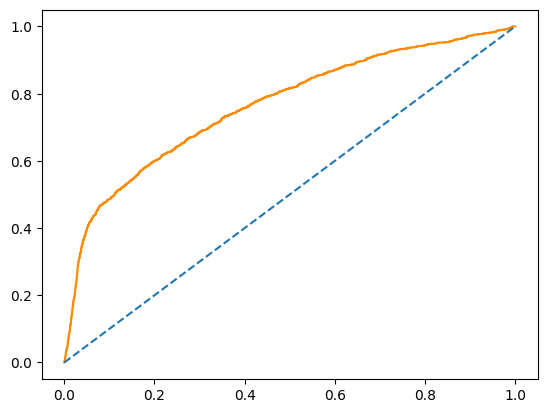

In [26]:
from sklearn import metrics

# Gáfico de la curva ROC de las probabilidades de incumplimiento
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = metrics.roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [27]:
from sklearn.metrics import roc_auc_score

# Área debajo de la curva
auc = roc_auc_score(y_test, prob_default)
auc

0.7643248801355148

In [28]:
# Estado del préstamo según el umbral 0.4
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

from sklearn.metrics import confusion_matrix

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_test,preds_df['loan_status']).ravel()

default_recall = tp / (tp + fn)

default_recall

0.46403712296983757

In [29]:
# Estado del prestamo según el umbral 0.5
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_test,preds_df['loan_status']).ravel()

default_recall = tp / (tp + fn)

default_recall

0.16782675947409126

In [30]:
avg_loan_amnt = cr_loan_clean['loan_amnt'].mean()

# Valores del estado del préstamo en función del nuevo umbral
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Número de impagos de préstamos a partir de los datos de predicción
num_defaults = preds_df['loan_status'].value_counts()[1]

# Default recall del reporte de clasificación
default_recall = precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1]

# Impacto estimado de la nueva tasa de recuperación predeterminada
print(avg_loan_amnt * num_defaults * (1 - default_recall))

9872265.223119883


In [31]:
# Conjuntos de umbrales y respectivas métricas
i = 0.2
# Umbrales
thresh = []
# recall de incumplimiento
def_recalls = []
# recall de no incumplimiento
nondef_recalls = []
# accuracy
accs = []
while i < 0.65 :
    thresh.append(i)
    preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > i else 0)
    def_recalls.append(precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1])
    nondef_recalls.append(precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][0])
    accs.append(precision_recall_fscore_support(y_test,preds_df['loan_status'])[0][1])
    i = i + 0.025

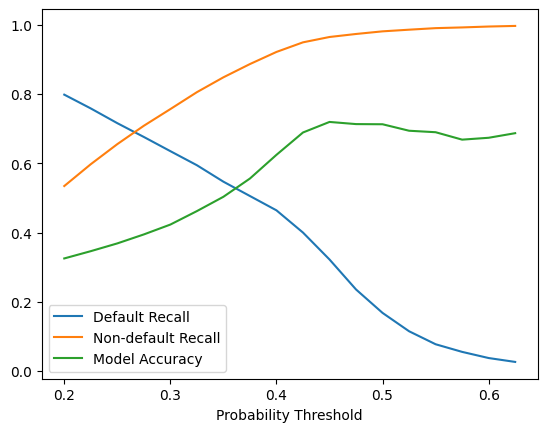

In [32]:
plt.plot(thresh,def_recalls)
plt.plot(thresh,nondef_recalls)
plt.plot(thresh,accs)
plt.xlabel("Probability Threshold")
plt.legend(["Default Recall","Non-default Recall","Model Accuracy"])
plt.show()

In [34]:
# Importación de los datos crediticios con variables dummies listo para modelar csv
cr_loan_prep = pd.read_csv("DatosCrediticios_ListoParaModelar.csv")

# Variables independientes y dependiente
X = cr_loan_prep.loc[:,cr_loan_prep.columns != 'loan_status']
y = cr_loan_prep[['loan_status']]

# Conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

In [36]:
# Ajuste del modelo
import xgboost as xgb
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Predicciones de la probabilidad de default con el modelo
gbt_preds = clf_gbt.predict_proba(X_test)

# Dataframes con probabilidades de dafault predicha y datos reales
preds_df = pd.DataFrame(gbt_preds[:,1][0:20], columns = ['prob_default'])
true_df = y_test.head(20)

# Comparación de los dos marcos de datos
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

    loan_status  prob_default
0             1      0.990942
1             1      0.983987
2             0      0.000807
3             0      0.001239
4             1      0.084892
5             1      0.021722
6             0      0.010304
7             0      0.000375
8             1      0.976663
9             1      0.992004
10            1      0.173216
11            1      0.997188
12            0      0.002653
13            0      0.001659
14            1      0.992790
15            0      0.004816
16            0      0.051240
17            1      0.998005
18            0      0.413108
19            0      0.147902


In [37]:
# Marco de datos llamado cartera para combinar las probabilidades de incumplimiento para
# ambos modelos (XGBoost y regresión logistica), la pérdida en caso de incumplimiento (20%
# por ahora) y el préstamo que se asumirá como la exposición en caso de incumplimiento.
portfolio = pd.DataFrame({'gbt_prob_default': gbt_preds[:,1], 'lr_prob_default': preds[:,1], 'lgd': [0.2] * 11784, 'loan_amnt': X_test['loan_amnt']})
portfolio

,gbt_prob_default,lr_prob_default,lgd,loan_amnt
28606,0.990942,0.445779,0.2,15000
22585,0.983987,0.223447,0.2,11200
13888,0.000807,0.288558,0.2,15000
3145,0.001239,0.169358,0.2,10800
14882,0.084892,0.114182,0.2,3000
...,...,...,...,...
22850,0.000727,0.079626,0.2,8000
27495,0.025336,0.051979,0.2,6600
27013,0.045719,0.522450,0.2,16000
1613,0.348737,0.370478,0.2,6000


In [38]:
# Creación de dos columnas usando la fórmula de la perdida esperada para cada modelo
portfolio['gbt_expected_loss'] = portfolio['gbt_prob_default'] * portfolio['lgd'] * portfolio['loan_amnt']
portfolio['lr_expected_loss'] = portfolio['lr_prob_default'] * portfolio['lgd'] * portfolio['loan_amnt']

# Suma de la perdida esperada para el modelo de regresión lineal
print('LR perdida esperada: ', np.sum(portfolio['lr_expected_loss']))

# Suma de la perdida esperada para el modelo de XGBoost
print('GBT perdida esperada: ', np.sum(portfolio['gbt_expected_loss']))

LR perdida esperada:  5596776.979852879
GBT perdida esperada:  5383982.8120276965


In [39]:
# Predicción del estado de préstamo
gbt_preds = clf_gbt.predict(X_test)

# Cadena de valores de los resulta
print(gbt_preds)

# Reporte de clasificación del modelo
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))

[1 1 0 ... 0 0 0]
              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      9198
     Default       0.94      0.74      0.83      2586

    accuracy                           0.93     11784
   macro avg       0.94      0.86      0.89     11784
weighted avg       0.93      0.93      0.93     11784



In [40]:
# Selección de algunas variables independientes de ejemplo
X = cr_loan_prep[['person_income','loan_int_rate','loan_percent_income','loan_amnt','person_home_ownership_MORTGAGE','loan_grade_F']]
y = cr_loan_prep[['loan_status']]

# Conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Entrenamiento del modelo
clf_gbt = xgb.XGBClassifier().fit(X_train,np.ravel(y_train))

# Importancias de las variables en el modelo
print(clf_gbt.get_booster().get_score(importance_type = 'weight'))

{'person_income': 1299.0, 'loan_int_rate': 1001.0, 'loan_percent_income': 515.0, 'loan_amnt': 519.0, 'person_home_ownership_MORTGAGE': 116.0, 'loan_grade_F': 9.0}


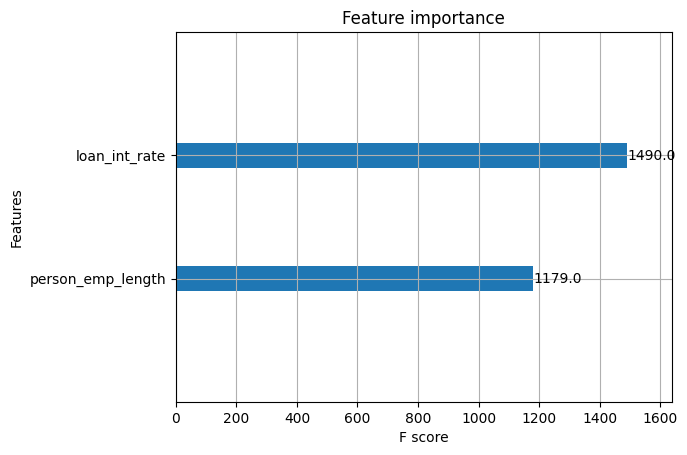

In [41]:
# Selección de algunas variables independientes de ejemplo
X2 = cr_loan_prep[['loan_int_rate','person_emp_length']]
y = cr_loan_prep[['loan_status']]

# Conjuntos de entrenamiento y prueba
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=.4, random_state=123)

# Entrenamiento de un modelo con las 2 variables seleccionadas
clf_gbt2 = xgb.XGBClassifier().fit(X2_train,np.ravel(y_train))

# Importancia de las variables para este modelo
xgb.plot_importance(clf_gbt2, importance_type = 'weight')
plt.show()

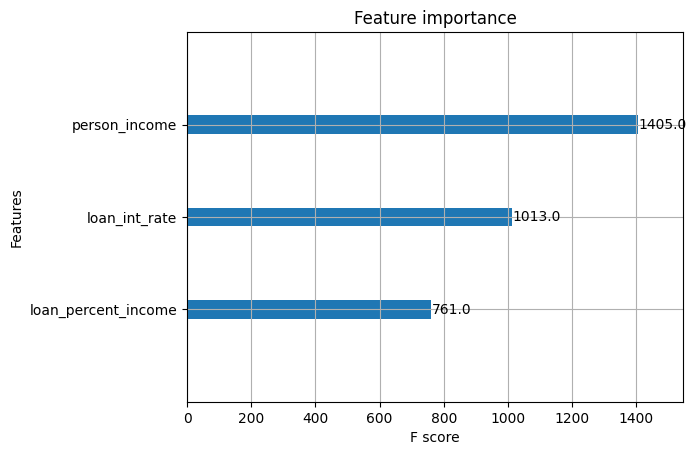

In [42]:
X3 = cr_loan_prep[['person_income','loan_int_rate','loan_percent_income']]
y = cr_loan_prep[['loan_status']]

# Conjuntos de entrenamiento y prueba
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=.4, random_state=123)

# Entrenamiento de un modelo con las 3 variables seleccionadas
clf_gbt3 = xgb.XGBClassifier().fit(X3_train,np.ravel(y_train))

# Importancia de las variables para este modelo
xgb.plot_importance(clf_gbt3, importance_type = 'weight')
plt.show()

In [43]:
# Selección de algunas variables independientes de ejemplo
X = cr_loan_prep[['person_income','loan_int_rate','loan_percent_income','loan_amnt','person_home_ownership_MORTGAGE']]
y = cr_loan_prep[['loan_status']]

# Conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Modelo XGBoost 1
gbt = xgb.XGBClassifier().fit(X_train,np.ravel(y_train))

# Predicción del estado del prestamo usando el modelo 1
gbt_preds = gbt.predict(X_test)

# Reporte de clasificación del primer modelo
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.91      0.95      0.93      9198
     Default       0.79      0.66      0.72      2586

    accuracy                           0.89     11784
   macro avg       0.85      0.81      0.83     11784
weighted avg       0.88      0.89      0.88     11784



In [44]:
# Selección de algunas variables independientes de ejemplo
X2 = cr_loan_prep[['person_income','loan_int_rate','loan_percent_income','person_emp_length', 'person_home_ownership_RENT']]
y = cr_loan_prep[['loan_status']]

# Conjuntos de entrenamiento y prueba
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=.4, random_state=123)

# Modelo XGBoost 2
gbt2 = xgb.XGBClassifier().fit(X2_train,np.ravel(y_train))

# Predicción del estado del prestamo usando el modelo 2
gbt2_preds = gbt2.predict(X2_test)

# Reporte de clasificación del segundo modelo
print(classification_report(y_test, gbt2_preds, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.91      0.97      0.94      9198
     Default       0.88      0.66      0.75      2586

    accuracy                           0.90     11784
   macro avg       0.89      0.82      0.85     11784
weighted avg       0.90      0.90      0.90     11784



In [46]:
# Variables independientes y dependiente
X = cr_loan_prep.loc[:,cr_loan_prep.columns != 'loan_status']
y = cr_loan_prep[['loan_status']]

# Conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Ajuste del modelo
gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Parametros
params = {'eval_metric': 'auc', 'objective': 'binary:logistic', 'seed': 123}

# Número de pliegues y interacciones
n_folds = 5
early_stopping = 10

# Matriz de entrenamiento para XGBoost
DTrain = xgb.DMatrix(X_train, label = y_train)

# Dataframe de la validación cruzada
cv_df = xgb.cv(params, DTrain, num_boost_round = 5, nfold=n_folds, early_stopping_rounds=early_stopping)
cv_df

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.898182,0.001318,0.892520,0.004650
1,0.909256,0.002052,0.902780,0.005053
2,0.913621,0.002205,0.906834,0.004423
3,0.918600,0.001092,0.910779,0.005221
4,0.922251,0.001818,0.914193,0.004422


In [47]:
# Validación cruzada con más pliegues e interacciones
cv_results_big = xgb.cv(params, DTrain, num_boost_round = 600, nfold=10, shuffle = True)
cv_results_big

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.897568,0.000909,0.892900,0.008258
1,0.906985,0.002611,0.901162,0.007519
2,0.913678,0.001404,0.907910,0.007753
3,0.919123,0.000921,0.912130,0.007145
4,0.922864,0.001097,0.914962,0.006706
...,...,...,...,...
595,1.000000,0.000000,0.942407,0.005217
596,1.000000,0.000000,0.942412,0.005203
597,1.000000,0.000000,0.942423,0.005219
598,1.000000,0.000000,0.942399,0.005226


In [48]:
# Media de los puntajes AUC del test
print(np.mean(cv_results_big['test-auc-mean']).round(2))

0.94


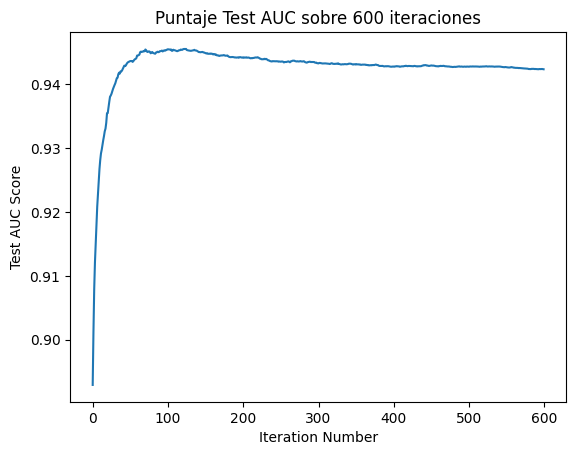

In [49]:
# Gráfico de las puntuaciones AUC del test para cada iteración
plt.plot(cv_results_big['test-auc-mean'])
plt.title('Puntaje Test AUC sobre 600 iteraciones')
plt.xlabel('Iteration Number')
plt.ylabel('Test AUC Score')
plt.show()

In [50]:
# Modelo de árbol potenciado por gradiente usando dos hiperparámetros
gbt = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 7)

from sklearn.model_selection import cross_val_score

# Puntajes de validación cruzada para 4 pliegues
cv_scores = cross_val_score(gbt, X_train, np.ravel(y_train), cv = 4)

# Puntuaciones de validación cruzada
print(cv_scores)

[0.94048427 0.93256393 0.93324282 0.92462653]


In [51]:
# Precisión promedio y la desviación estándar de las puntuaciones
print("Precisión promedio: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Precisión promedio: 0.93 (+/- 0.01)


In [52]:
# Concatenación de las muestras de entrenamiento
X_y_train = pd.concat([X_train.reset_index(drop = True), y_train.reset_index(drop = True)], axis = 1)

# Cuenta de incumplidos y no incumplidos
count_nondefault, count_default = X_y_train['loan_status'].value_counts()

# Conjunto de datos para defaults and non-defaults
nondefaults = X_y_train[X_y_train['loan_status'] == 0]
defaults = X_y_train[X_y_train['loan_status'] == 1]

# Submuestreo de non-defaults
nondefaults_under = nondefaults.sample(count_default)

# Concatenación de submuestreo de nondefaults with defaults
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop = True), defaults.reset_index(drop = True)], axis = 0)

# Conteo del estado del préstamo
print(X_y_train_under['loan_status'].value_counts())

0    3877
1    3877
Name: loan_status, dtype: int64


In [53]:
# Variables independientes y dependiente
X = cr_loan_prep.loc[:,cr_loan_prep.columns != 'loan_status']
y = cr_loan_prep[['loan_status']]

# Conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Ajuste del modelo
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Predicciones de la probabilidad de default con el modelo
gbt_preds = clf_gbt.predict(X_test)

In [54]:
# Variables independientes y dependiente
X_train_under = X_y_train_under.loc[:,X_y_train_under.columns != 'loan_status']
y_train_under = X_y_train_under[['loan_status']]

# Ajuste del modelo
clf_gbt2 = xgb.XGBClassifier().fit(X_train_under, np.ravel(y_train_under))

# Predicciones de la probabilidad de default con el modelo
gbt2_preds = clf_gbt2.predict(X_test)

In [55]:
# Reportes de clasificación
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))
print(classification_report(y_test, gbt2_preds, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      9198
     Default       0.94      0.74      0.83      2586

    accuracy                           0.93     11784
   macro avg       0.94      0.86      0.89     11784
weighted avg       0.93      0.93      0.93     11784

              precision    recall  f1-score   support

 Non-Default       0.95      0.91      0.93      9198
     Default       0.73      0.82      0.77      2586

    accuracy                           0.89     11784
   macro avg       0.84      0.87      0.85     11784
weighted avg       0.90      0.89      0.90     11784



In [56]:
# Matriz de confusión de ambos modelos
print(confusion_matrix(y_test,gbt_preds))
print(confusion_matrix(y_test,gbt2_preds))

[[9085  113]
 [ 677 1909]]
[[8416  782]
 [ 469 2117]]


In [57]:
# Comparación de los puntajes AUC de los modelos
print(roc_auc_score(y_test, gbt_preds))
print(roc_auc_score(y_test, gbt2_preds))

0.8629602218579747
0.8668101710802659


In [58]:
# Variables independientes y dependiente

X = cr_loan_prep.loc[:,cr_loan_prep.columns != 'loan_status']
y = cr_loan_prep[['loan_status']]

# Conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Ajuste del modelo de regresión logística
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Predicciones de probabilidad para el estado del préstamo usando datos de prueba
preds_df_lr = clf_logistic.predict_proba(X_test)
preds_df_lr

# Dataframe de las probabilidades de incumplimiento
preds_df_lr = pd.DataFrame(preds_df_lr[:,1], columns = ['prob_default'])

# Estado del préstamo según la probabilidad asignada
preds_df_lr['loan_status'] = preds_df_lr['prob_default'].apply(lambda X: 1 if X > .4 else 0)
preds_df_lr


,prob_default,loan_status
0,0.445779,1
1,0.223447,0
2,0.288558,0
3,0.169358,0
4,0.114182,0
...,...,...
11779,0.079626,0
11780,0.051979,0
11781,0.522450,1
11782,0.370478,0


In [59]:
# Ajuste del modelo XGBoost
clf_gbt = xgb.XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=7, min_child_weight=1, min_split_loss=1.0, n_estimators=100, n_jobs=1, random_state=0, reg_alpha=0, reg_lambda=1.2, scale_pos_weight=1, seed=123, subsample=1).fit(X_train, np.ravel(y_train))

# Predicciones de la probabilidad de default con el modelo
preds_df_gbt = clf_gbt.predict_proba(X_test)

# Dataframe de las probabilidades de incumplimiento
preds_df_gbt = pd.DataFrame(preds_df_gbt[:,1], columns = ['prob_default'])

# Estado del préstamo según la probabilidad asignada
preds_df_gbt['loan_status'] = preds_df_gbt['prob_default'].apply(lambda X: 1 if X > .4 else 0)
preds_df_gbt

,prob_default,loan_status
0,0.982387,1
1,0.975163,1
2,0.003474,0
3,0.005457,0
4,0.119876,0
...,...,...
11779,0.003521,0
11780,0.028647,0
11781,0.107442,0
11782,0.217885,0


In [60]:
# Reporte de de clasificación de regresión logística
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df_lr['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.86      0.92      0.89      9198
     Default       0.62      0.46      0.53      2586

    accuracy                           0.82     11784
   macro avg       0.74      0.69      0.71     11784
weighted avg       0.81      0.82      0.81     11784



In [61]:
# Reporte de clasificación de árboles potenciados por gradiente
print(classification_report(y_test, preds_df_gbt['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      9198
     Default       0.94      0.73      0.82      2586

    accuracy                           0.93     11784
   macro avg       0.93      0.86      0.89     11784
weighted avg       0.93      0.93      0.93     11784



In [62]:
# Puntuaciones F-1 de incumplimiento para la regresión logística
print(precision_recall_fscore_support(y_test,preds_df_lr['loan_status'], average = 'macro')[2])

0.7108943782814463


In [63]:
# Puntuaciones F-1 de incumplimiento para el modelo de arboles poteciados por gradiente
print(precision_recall_fscore_support(y_test,preds_df_gbt['loan_status'], average = 'macro')[2])

0.8909014142736051


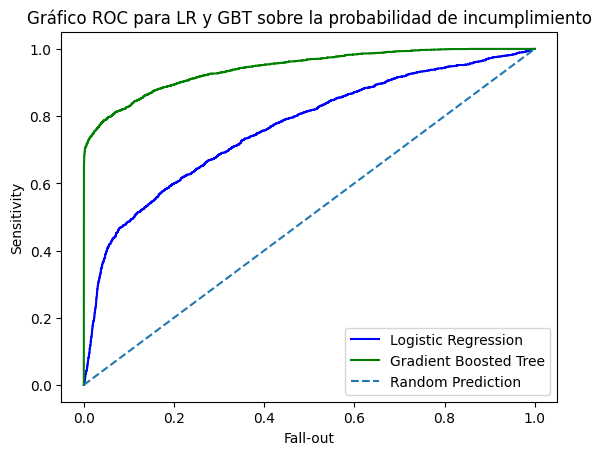

In [64]:
# Predicciones de probabilidad para el estado del préstamo usando datos de prueba
clf_logistic_preds = np.array(preds_df_lr['prob_default'])
clf_gbt_preds = np.array(preds_df_gbt['prob_default'])

# Componentes del gráfico ROC
fallout_lr, sensitivity_lr, thresholds_lr = metrics.roc_curve(y_test, clf_logistic_preds)
fallout_gbt, sensitivity_gbt, thresholds_gbt = metrics.roc_curve(y_test, clf_gbt_preds)

# Gráfico ROC con ambos componentes
plt.plot(fallout_lr, sensitivity_lr, color = 'blue', label='%s' % 'Logistic Regression')
plt.plot(fallout_gbt, sensitivity_gbt, color = 'green', label='%s' % 'Gradient Boosted Tree')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("Gráfico ROC para LR y GBT sobre la probabilidad de incumplimiento")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

In [65]:
# Puntaje AUC de la regresión logística
print("Logistic Regression AUC Score: %0.2f" % roc_auc_score(y_test, clf_logistic_preds))

# Puntaje AUC de los arboles potenciados por gradiente
print("Gradient Boosted Tree AUC Score: %0.2f" % roc_auc_score(y_test, clf_gbt_preds))

Logistic Regression AUC Score: 0.76
Gradient Boosted Tree AUC Score: 0.94


In [66]:
from sklearn.calibration import calibration_curve

# Fracción de positivos
frac_of_pos_lr = calibration_curve(y_test, clf_logistic_preds, n_bins = 20)[0]
frac_of_pos_lr


array([0.07886231, 0.06610942, 0.10835913, 0.13505074, 0.16063348,
       0.18333333, 0.21268657, 0.24099099, 0.48036649, 0.72677596,
       0.73354232, 0.70547945, 0.68      , 0.73913043, 0.55555556,
       0.4       ])

In [67]:
# Probabilidad media
mean_pred_val_lr = calibration_curve(y_test, clf_logistic_preds, n_bins = 20)[1]
mean_pred_val_lr

array([0.02111464, 0.07548788, 0.12582662, 0.17502903, 0.22449499,
       0.27491676, 0.32488847, 0.37486698, 0.42302912, 0.47397249,
       0.52304288, 0.57259508, 0.62200793, 0.67156702, 0.71909209,
       0.77024859])

In [68]:
# Fracción de positivos
frac_of_pos_gbt = calibration_curve(y_test, clf_gbt_preds, n_bins = 20)[0]
frac_of_pos_gbt

array([0.01916168, 0.06385752, 0.12795793, 0.17460317, 0.21806854,
       0.32620321, 0.32653061, 0.33333333, 0.40677966, 0.43181818,
       0.6       , 0.42105263, 0.31578947, 0.6875    , 0.78571429,
       0.83333333, 0.90697674, 0.95238095, 0.98850575, 1.        ])

In [69]:
# Probabilidad media
mean_pred_val_gbt = calibration_curve(y_test, clf_gbt_preds, n_bins = 20)[1]
mean_pred_val_gbt

array([0.01937249, 0.07211534, 0.12178284, 0.17298487, 0.22318428,
       0.2716055 , 0.32285183, 0.36934401, 0.42164062, 0.47158215,
       0.52230486, 0.57041399, 0.62149715, 0.67234764, 0.72826275,
       0.77567047, 0.82827961, 0.87636708, 0.92830987, 0.98579916])

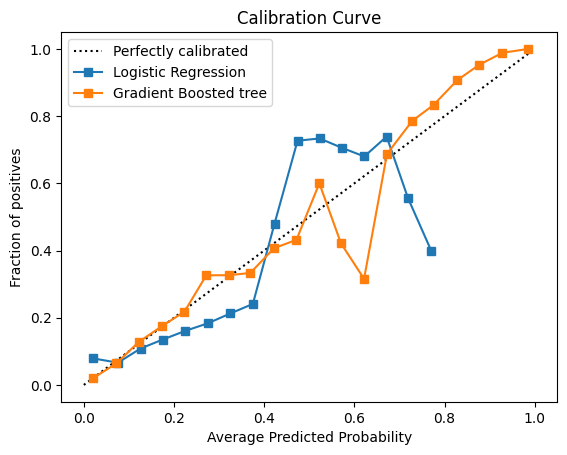

In [70]:
# Curva de calibración
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    
plt.plot(mean_pred_val_lr, frac_of_pos_lr, 's-', label='%s' % 'Logistic Regression')
plt.plot(mean_pred_val_gbt, frac_of_pos_gbt, 's-', label='%s' % 'Gradient Boosted tree')
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

In [71]:
# Estadísticas de las probabilidades de incumplimiento
true_list = pd.DataFrame(y_test, columns = ['loan_status']).rename(columns={'loan_status':'true_loan_status'}, inplace=False)
test_pred_df = pd.concat([true_list.reset_index(drop = True), preds_df_gbt['prob_default']], axis = 1)
print(test_pred_df['prob_default'].describe())

count    11784.000000
mean         0.216866
std          0.333038
min          0.000354
25%          0.022246
50%          0.065633
75%          0.177804
max          0.999557
Name: prob_default, dtype: float64


In [72]:
# Umbral para una tasa de aceptación del 85 %
threshold_85 = np.quantile(test_pred_df['prob_default'], 0.85)

# Umbral de tasa de aceptación
test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > threshold_85 else 0)

# Recuentos del estado del préstamo después del umbral
print(test_pred_df['pred_loan_status'].value_counts())

0    10016
1     1768
Name: pred_loan_status, dtype: int64


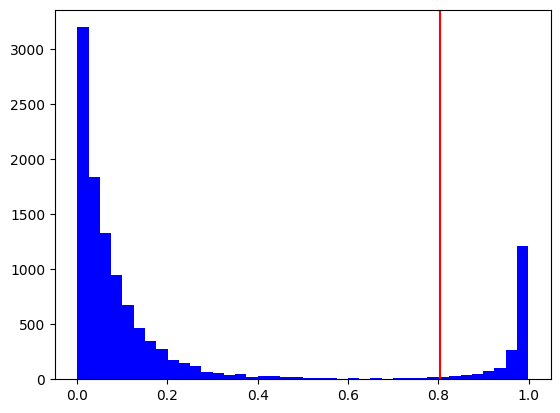

In [73]:
# Histograma de las probabilidades previstas de incumplimiento
plt.hist(clf_gbt_preds, color = 'blue', bins = 40)

# Línea de referencia al gráfico para el umbral
plt.axvline(x = threshold_85, color = 'red')
plt.show()

In [74]:
test_pred_df

,true_loan_status,prob_default,pred_loan_status
0,1,0.982387,1
1,1,0.975163,1
2,0,0.003474,0
3,0,0.005457,0
4,1,0.119876,0
...,...,...,...
11779,0,0.003521,0
11780,0,0.028647,0
11781,0,0.107442,0
11782,0,0.217885,0


In [75]:
# Subconjunto de solo préstamos aceptados
accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]

# Cálculo de la baja tasa
print(np.sum(accepted_loans['true_loan_status']) / accepted_loans['true_loan_status'].count())

0.08256789137380191


In [76]:
test_pred_df = test_pred_df.rename(columns={'pred_loan_status':'pred_loan_status_15'}, inplace=False)
test_pred_df['loan_amnt'] = X_test['loan_amnt'].reset_index(drop = True)
test_pred_df

,true_loan_status,prob_default,pred_loan_status_15,loan_amnt
0,1,0.982387,1,15000
1,1,0.975163,1,11200
2,0,0.003474,0,15000
3,0,0.005457,0,10800
4,1,0.119876,0,3000
...,...,...,...,...
11779,0,0.003521,0,8000
11780,0,0.028647,0,6600
11781,0,0.107442,0,16000
11782,0,0.217885,0,6000


In [77]:
# Estadísticas de la variable monto del préstamo
print(test_pred_df['loan_amnt'].describe())

count    11784.000000
mean      9556.283944
std       6238.005674
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


In [78]:
# Almacenar el monto promedio del préstamo
avg_loan = np.mean(test_pred_df['loan_amnt'])

# Formato de moneda y tabulación cruzada
pd.options.display.float_format = '${:,.2f}'.format
print(pd.crosstab(test_pred_df['true_loan_status'], test_pred_df['pred_loan_status_15']).apply(lambda x: x * avg_loan, axis = 0))

pred_loan_status_15              0              1
true_loan_status                                 
0                   $87,812,693.16     $86,006.56
1                    $7,903,046.82 $16,809,503.46


In [79]:
# Matriz de tazas de aceptación
accept_rates = [1.0,
 0.95,
 0.9,
 0.85,
 0.8,
 0.75,
 0.7,
 0.65,
 0.6,
 0.55,
 0.5,
 0.45,
 0.4,
 0.35,
 0.3,
 0.25,
 0.2,
 0.15,
 0.1,
 0.05]

In [80]:
# Matriz de umbrales
thresholds = []

In [81]:
# Matriz de bajas tazas de aceptación
bad_rates = []

In [82]:
test_pred_df = test_pred_df.rename(columns={'pred_loan_status_15':'pred_loan_status'}, inplace=False)
test_pred_df

,true_loan_status,prob_default,pred_loan_status,loan_amnt
0,1,$0.98,1,15000
1,1,$0.98,1,11200
2,0,$0.00,0,15000
3,0,$0.01,0,10800
4,1,$0.12,0,3000
...,...,...,...,...
11779,0,$0.00,0,8000
11780,0,$0.03,0,6600
11781,0,$0.11,0,16000
11782,0,$0.22,0,6000


In [83]:
# Prestamos aceptados
accepted_loans = accepted_loans[0:0]

In [84]:
# Número de prestamos aceptados
num_accepted_loans = []

In [85]:
# Matrices de la tabla de estrategia con un bucle for
for rate in accept_rates:
    # Umbral para la tasa de aceptación
    thresh = np.quantile(preds_df_gbt['prob_default'], rate).round(3)
    # Agregación del valor del umbral a la lista de umbrales
    thresholds.append(np.quantile(preds_df_gbt['prob_default'], rate).round(3))
    # Reasignación del valor del estado del préstamo usando el umbral
    test_pred_df['pred_loan_status'] = \
        test_pred_df['prob_default'].apply(lambda x: 1 if x > thresh else 0)
    # Conjunto de préstamos aceptados usando esta tasa de aceptación
    accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]
    # Calculo y asignación de la tasa baja usando la tasa de aceptación
    bad_rates.append(np.sum((accepted_loans['true_loan_status'])
             / accepted_loans['true_loan_status'].count()).round(3))
    # Numero de prestamos aceptados
    num_accepted_loans.append(len(test_pred_df[test_pred_df['prob_default']<np.quantile(test_pred_df['prob_default'], rate).round(3)]))


In [86]:
# Marco de datos de la tabla de estrategia comercial
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates), columns = ['Acceptance Rate','Threshold','Bad Rate'])
strat_df

,Acceptance Rate,Threshold,Bad Rate
0,$1.00,$1.00,$0.22
1,$0.95,$0.99,$0.18
2,$0.90,$0.98,$0.13
3,$0.85,$0.80,$0.08
4,$0.80,$0.25,$0.06
5,$0.75,$0.18,$0.05
6,$0.70,$0.14,$0.04
7,$0.65,$0.11,$0.04
8,$0.60,$0.09,$0.03
9,$0.55,$0.08,$0.03


In [87]:
# Monto promedio del prestamo
mean_loan_amnt = np.mean(test_pred_df['loan_amnt']).repeat(20)

In [88]:
# Marco de datos de la tabla de estrategia comercial con el monto promedio del prestamo
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates, num_accepted_loans, mean_loan_amnt), columns = ['Acceptance Rate','Threshold','Bad Rate', 'Num Accepted Loans', 'Avg Loan Amnt'])
strat_df

,Acceptance Rate,Threshold,Bad Rate,Num Accepted Loans,Avg Loan Amnt
0,$1.00,$1.00,$0.22,11784,"$9,556.28"
1,$0.95,$0.99,$0.18,11208,"$9,556.28"
2,$0.90,$0.98,$0.13,10597,"$9,556.28"
3,$0.85,$0.80,$0.08,10016,"$9,556.28"
4,$0.80,$0.25,$0.06,9425,"$9,556.28"
5,$0.75,$0.18,$0.05,8843,"$9,556.28"
6,$0.70,$0.14,$0.04,8248,"$9,556.28"
7,$0.65,$0.11,$0.04,7653,"$9,556.28"
8,$0.60,$0.09,$0.03,7058,"$9,556.28"
9,$0.55,$0.08,$0.03,6496,"$9,556.28"


In [89]:
# El valor neto estimado de los no impagos menos los impagos
estimated_value = ((strat_df['Num Accepted Loans'] * (1 - strat_df['Bad Rate'])) * strat_df['Avg Loan Amnt']) - (strat_df['Num Accepted Loans'] * strat_df['Bad Rate'] * strat_df['Avg Loan Amnt'])


In [90]:
# Marco de datos de la tabla de estrategia comercial con el valor neto
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates, num_accepted_loans, mean_loan_amnt, estimated_value), columns = ['Acceptance Rate','Threshold','Bad Rate', 'Num Accepted Loans', 'Avg Loan Amnt', 'Estimated Value'])
strat_df

,Acceptance Rate,Threshold,Bad Rate,Num Accepted Loans,Avg Loan Amnt,Estimated Value
0,$1.00,$1.00,$0.22,11784,"$9,556.28","$63,287,522.50"
1,$0.95,$0.99,$0.18,11208,"$9,556.28","$68,762,585.15"
2,$0.90,$0.98,$0.13,10597,"$9,556.28","$74,533,204.55"
3,$0.85,$0.80,$0.08,10016,"$9,556.28","$79,826,927.15"
4,$0.80,$0.25,$0.06,9425,"$9,556.28","$79,079,683.08"
5,$0.75,$0.18,$0.05,8843,"$9,556.28","$75,717,572.15"
6,$0.70,$0.14,$0.04,8248,"$9,556.28","$72,041,690.20"
7,$0.65,$0.11,$0.04,7653,"$9,556.28","$67,868,575.67"
8,$0.60,$0.09,$0.03,7058,"$9,556.28","$63,401,356.95"
9,$0.55,$0.08,$0.03,6496,"$9,556.28","$58,725,429.00"


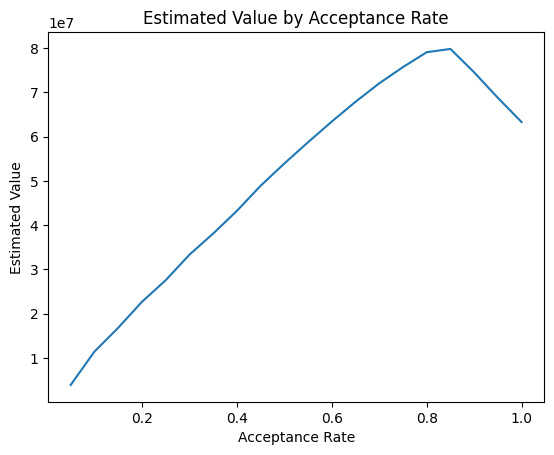

In [91]:
# Gráfico con los valores estimados
plt.plot(strat_df['Acceptance Rate'],strat_df['Estimated Value'])
plt.title('Estimated Value by Acceptance Rate')
plt.xlabel('Acceptance Rate')
plt.ylabel('Estimated Value')
plt.show()

In [92]:
# Fila con el valor máximo estimado
print(strat_df.loc[strat_df['Estimated Value'] == np.max(strat_df['Estimated Value'])])

   Acceptance Rate  Threshold  Bad Rate  Num Accepted Loans  Avg Loan Amnt  \
3            $0.85      $0.80     $0.08               10016      $9,556.28   

   Estimated Value  
3   $79,826,927.15  


In [93]:
# Suposición de que la exposición es el valor total del préstamo y que la pérdida en caso de incumplimiento es del 100 %.
test_pred_df['pred_loan_status'] = 1
test_pred_df = test_pred_df.rename(columns={'pred_loan_status':'loss_given_default'}, inplace=False)
test_pred_df

,true_loan_status,prob_default,loss_given_default,loan_amnt
0,1,$0.98,1,15000
1,1,$0.98,1,11200
2,0,$0.00,1,15000
3,0,$0.01,1,10800
4,1,$0.12,1,3000
...,...,...,...,...
11779,0,$0.00,1,8000
11780,0,$0.03,1,6600
11781,0,$0.11,1,16000
11782,0,$0.22,1,6000


In [94]:
# Pérdida esperada del banco
test_pred_df['expected_loss'] = test_pred_df['prob_default'] * test_pred_df['loss_given_default'] * test_pred_df['loan_amnt']

# Pérdida total esperada con dos decimales
tot_exp_loss = round(np.sum(test_pred_df['expected_loss']),2)

# Pérdida total esperada
print('Total expected loss: ', '${:,.2f}'.format(tot_exp_loss))

Total expected loss:  $27,084,153.48
